## Multiclass Classification: IRIS Dataset
https://archive.ics.uci.edu/ml/datasets/iris

** Dataset Information: **

The data set contains 3 classes of iris plant (Iris setosa, Iris virginica and Iris versicolor) of 50 samples each, 150 samples in total.

** Attribute Information: (4 features and 1 class)**

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

** Objective of this project **

predict class of iris plant (Setosa, Versicolour and Virginica) based on sepal/petal measurements (features)

## Data

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [3]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Class']
df = pd.read_csv(url, names=names)

In [3]:
# Inspect Data
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

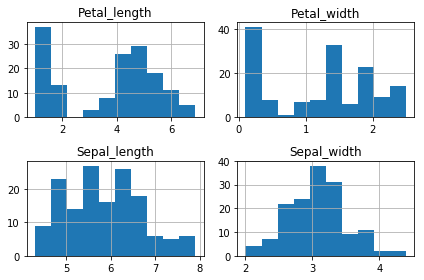

In [6]:
_ = df.hist()#figsize=(12,10))
plt.tight_layout()

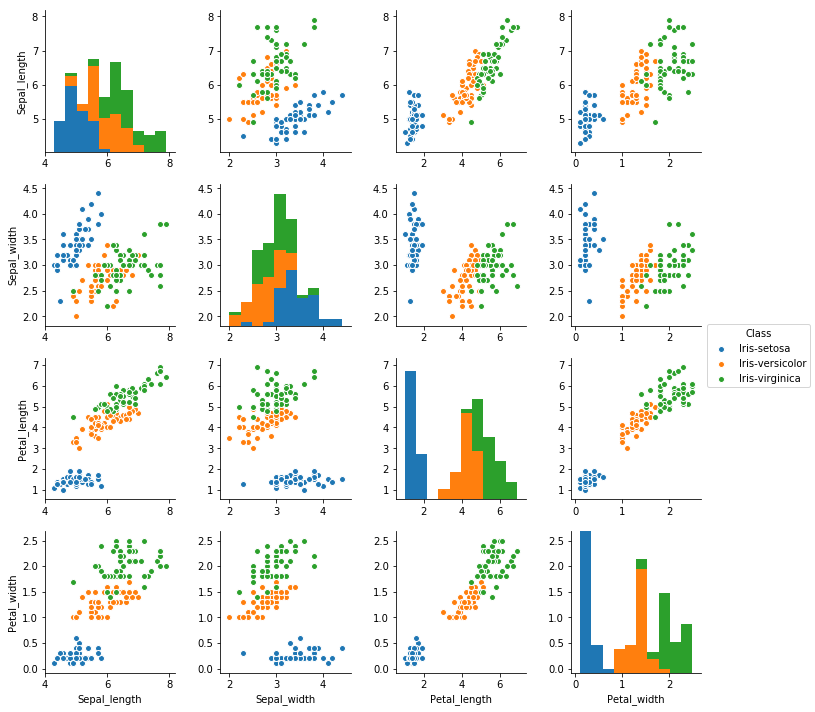

In [7]:
sns.pairplot(df, hue='Class')

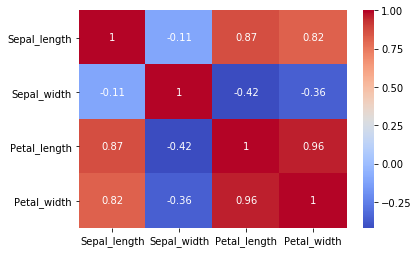

In [8]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_length    150 non-null float64
Sepal_width     150 non-null float64
Petal_length    150 non-null float64
Petal_width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Class, dtype: int64

In [6]:
df.isnull().any()

Sepal_length    False
Sepal_width     False
Petal_length    False
Petal_width     False
Class           False
dtype: bool

## Data preprocessing

In [7]:
seed = 7 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [8]:
X = df.drop('Class', axis=1).values
#encode categorical to binary
y = pd.get_dummies(df['Class']).values
print(X.shape,y.shape)

(150, 4) (150, 3)


** Split Train Test Sets **

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


** Scale features **
(Non-scale features yield better accuracy for this problem)

In [115]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

## Baseline Model

### LDA: best ML algorithm

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
model = LinearDiscriminantAnalysis()
model.fit(X_train, np.argmax(y_train,axis=1))
accuracy = model.score(X_train, np.argmax(y_train,axis=1))
y_pred = model.predict(X_test)
print('Accuracy of train set: {:0.1f}%'.format(accuracy*100))
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100))

Accuracy of train set: 98.3%
Accuracy of test set: 96.7%


### Baseline MLP model

In [47]:
# Import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,RMSprop,SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold,GridSearchCV

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
Total params: 1,003
Trainable params: 1,003
Non-trainable params: 0
_________________________________________________________________
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


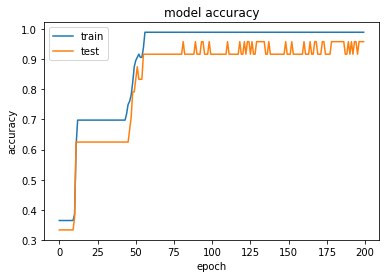

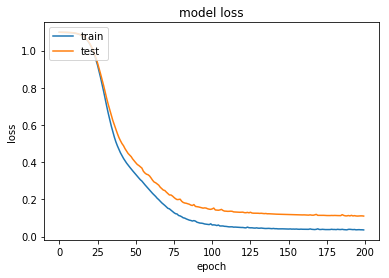

loss of train set: 0.051
accuracy of train set: 98.3%
loss of test set: 0.080
accuracy of test set: 96.7%


In [40]:
K.clear_session()
np.random.seed(seed) 
#create model
model = Sequential()
model.add(Dense(20, kernel_initializer='uniform', input_shape=(4,), activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#fit model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200,verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

## Parameter Tuning
try to see whether there's a room for improvement

### Batch size &  epochs

In [41]:
K.clear_session()
np.random.seed(seed)

def create_model():
    model = Sequential()
    model.add(Dense(20, kernel_initializer='uniform', input_shape=(4,), activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_fn=create_model)

# Grid Search
batch_size = [16,32]
epochs = [100, 150, 200]
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train, verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 243us/step
0.975000 (0.020412) with: {'batch_size': 16, 'epochs': 100}
0.983333 (0.011785) with: {'batch_size': 16, 'epochs': 150}
0.975000 (0.020412) with: {'batch_size': 16, 'epochs': 200}
0.975000 (0.020412) with: {'batch_size': 32, 'epochs': 100}
0.975000 (0.020412) with: {'batch_size': 32, 'epochs': 150}
0.966667 (0.031180) with: {'batch_size': 32, 'epochs': 200}
Best: 98.3% using {'batch_size': 16, 'epochs': 150}


### Optimizer

In [42]:
K.clear_session()
np.random.seed(seed) 
def create_model(optimizer='adam'):     
    model = Sequential()
    model.add(Dense(20, kernel_initializer='uniform', input_shape=(4,), activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=16
epochs=150
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
optimizer = ['sgd', 'rmsprop', 'adam']#, 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0)
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 50us/step
0.316667 (0.062361) with: {'optimizer': 'sgd'}
0.983333 (0.011785) with: {'optimizer': 'rmsprop'}
0.975000 (0.020412) with: {'optimizer': 'adam'}
Best: 98.3% using {'optimizer': 'rmsprop'}


### Optimizer: Learning Rate

In [48]:
K.clear_session()
np.random.seed(seed) 
def create_model(lr=0.001):     
    model = Sequential()
    model.add(Dense(20, kernel_initializer='uniform', input_shape=(4,), activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
    model.compile(optimizer=RMSprop(lr=lr), loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=16
epochs=150
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
lr = [0.1,0.01,0.001]#, 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
param_grid = dict(lr=lr)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0)
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 100us/step
0.533333 (0.188562) with: {'lr': 0.1}
0.941667 (0.042492) with: {'lr': 0.01}
0.975000 (0.020412) with: {'lr': 0.001}
Best: 97.5% using {'lr': 0.001}


In [52]:
K.clear_session()
np.random.seed(seed) 
def create_model(rho=0.9,lr=0.001):     
    model = Sequential()
    model.add(Dense(20, kernel_initializer='uniform', input_shape=(4,), activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
    model.compile(optimizer=RMSprop(lr=lr,rho=rho), loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=16
epochs=150
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
rho = [0.99, 0.9, 0.8]
param_grid = dict(rho=rho)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0)
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 50us/step
0.975000 (0.020412) with: {'rho': 0.99}
0.983333 (0.011785) with: {'rho': 0.9}
0.975000 (0.020412) with: {'rho': 0.8}
Best: 98.3% using {'rho': 0.9}


### Initializer

In [43]:
K.clear_session()
np.random.seed(seed)
def create_model(init_mode='uniform',optimizer='rmsprop'):     
    model = Sequential()
    model.add(Dense(20, kernel_initializer=init_mode, input_shape=(4,), activation='relu'))
    model.add(Dense(20, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(20, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=16
epochs=150
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
init_mode = ['uniform', 'glorot_normal','zero']#,'lecun_uniform', 'normal',   'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train, y_train, verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 50us/step
0.975000 (0.020412) with: {'init_mode': 'uniform'}
0.958333 (0.042492) with: {'init_mode': 'glorot_normal'}
0.283333 (0.023570) with: {'init_mode': 'zero'}
Best: 97.5% using {'init_mode': 'uniform'}


### Activation function

In [44]:
K.clear_session()
np.random.seed(seed) 
def create_model(activation='relu',init_mode='uniform',optimizer='rmsprop'):     
    model = Sequential()
    model.add(Dense(20, kernel_initializer=init_mode, input_shape=(4,), activation=activation))
    model.add(Dense(20, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(20, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=16
epochs=150
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
activation = ['relu', 'tanh', 'sigmoid','linear']#'softmax', 'softplus', 'softsign',  'hard_sigmoid', ]
param_grid = dict(activation=activation)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train, y_train, verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 100us/step
0.975000 (0.020412) with: {'activation': 'relu'}
0.975000 (0.020412) with: {'activation': 'tanh'}
0.850000 (0.162019) with: {'activation': 'sigmoid'}
0.975000 (0.020412) with: {'activation': 'linear'}
Best: 97.5% using {'activation': 'relu'}


### Dropout

In [45]:
K.clear_session()
np.random.seed(seed)
def create_model(dropout_rate=0.0, activation='relu',init_mode='uniform',optimizer='rmsprop'):     
    model = Sequential()
    model.add(Dense(20, kernel_initializer=init_mode, input_shape=(4,), 
                    activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(20, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, kernel_initializer=init_mode, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    return model
batch_size=16
epochs=150
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
dropout_rate = [0.0, 0.1,0.2,0.4]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(classifier, param_grid=param_grid, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train, verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

80/80 [==============================] - 0s 50us/step
0.975000 (0.020412) with: {'dropout_rate': 0.0}
0.975000 (0.020412) with: {'dropout_rate': 0.1}
0.975000 (0.020412) with: {'dropout_rate': 0.2}
0.966667 (0.011785) with: {'dropout_rate': 0.4}
Best: 97.5% using {'dropout_rate': 0.0}


## Final Model 
#### params: optimizer='adam', kernel_initializer='uniform', activation='relu', epochs=150, batch_size=16 (as baseline)

In [58]:
K.clear_session()
np.random.seed(seed)
# train model
model = Sequential()
model.add(Dense(20, kernel_initializer='uniform', input_shape=(4,), 
                activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)
# evaluate model on train set
scores = model.evaluate(X_train,y_train, verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))

loss of train set: 0.044
accuracy of train set: 98.3%


** Save and load the final model to JSON or YAML ** https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

** 1) JSON **

In [59]:
# save model as JSON
filename = 'model'
# model architecture
model_json = model.to_json()
with open(filename+'.json', 'w') as json_file:
    json_file.write(model_json)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.json,',filename+'.h5')

Saved model in model.json, model.h5


In [155]:
#del model

In [60]:
#load model from JSON
filename = 'model'
# model architecture
from keras.models import model_from_json
json_file = open(filename+'.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.json,',filename+'.h5')
print(model.summary())

Loaded model from model.json, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
Total params: 1,003
Trainable params: 1,003
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
# evaluate loaded model on test data
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

loss of test set: 0.091
accuracy of test set: 96.7%


** 2) YAML **

In [62]:
# save model as YAML
filename = 'model'
# model architecture
model_yaml= model.to_yaml()
with open(filename+'.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.yaml,',filename+'.h5')

Saved model in model.yaml, model.h5


In [63]:
#load model from YAML
filename = 'model'
# model architecture
from keras.models import model_from_yaml
yaml_file = open(filename+'.json', 'r')
model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(model_yaml)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.yaml,',filename+'.h5')
print(model.summary())

Loaded model from model.yaml, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
Total params: 1,003
Trainable params: 1,003
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
# evaluate loaded model on test data
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

loss of test set: 0.091
accuracy of test set: 96.7%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.97      0.97      0.97        38
          2       0.97      0.97      0.97        39

avg / total       0.98      0.98      0.98       120



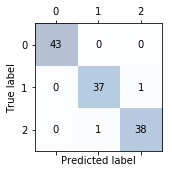

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(np.argmax(y_train,axis=1), model.predict_classes(X_train,verbose=0)))

#confusion matrix
confmat = confusion_matrix(np.argmax(y_train,axis=1), model.predict_classes(X_train,verbose=0))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [66]:
# predict class with test set (new, unseen)
y_pred = model.predict_classes(X_test,verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred)*100))

Accuracy: 96.7%


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       1.00      0.92      0.96        12
          2       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30



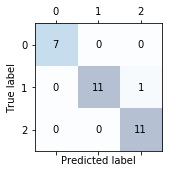

In [67]:
#classification report
print(classification_report(np.argmax(y_test,axis=1), model.predict_classes(X_test,verbose=0)))

#confusion matrix
confmat = confusion_matrix(np.argmax(y_test,axis=1), model.predict_classes(X_test,verbose=0))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

- Model Architecture: 3 hidden layers (20 nodes for each)

    
- Best params: epochs=150, batch_size=16, optimizer='adam', kernel_initializer='uniform', activation='relu'

    
- Accuracy of test set: ** 96.7% ** (tie with LDA)